# Overview

This notebook goes through a fixed-base and chained bilateral indices methods demonstrated by Aizcorbe (2014) in 2.1. This this example Ana Aizcorbe uses US National Income and Product Accounts data from the BEA to demonstrate how the Laspeyres, Paasche, and Fisher behave differently when you use a fixed base versus when they are chained.

In [71]:
import pandas as pd
import numpy as np
from PriceIndexCalc.pandas_modules.index_methods import bilateral_methods

In [82]:
#if not run before, use the helper to clean the data and make it analysis ready
from src.nipa_helper import clean_nipa_data

clean_nipa_data()

ModuleNotFoundError: No module named 'src'

## Explore the data

While the raw data is a tad hard to work with (and looks awkward in Table 2.3), this data is provided in cleaned `csv` format in the `data\bronze` folder

In [70]:
df = pd.read_csv("../data/silver/NIPA_ard.csv")
df.head()

,Unnamed: 0,Years,id,quantity,price
0,0,2000,Motor Vehicles and Parts,363.2,102.00
1,1,2001,Motor Vehicles and Parts,383.3,102.40
2,2,2002,Motor Vehicles and Parts,401.3,101.86
3,3,2003,Motor Vehicles and Parts,401.0,99.08
4,4,2004,Motor Vehicles and Parts,403.9,98.40


Try the base bilateral indices

,index_value
2000,1.000000
2001,0.976995
2002,0.950021
2003,0.914880
2004,0.895824
2005,0.885266
2006,0.870273
2007,0.854862
2008,0.837859
2009,0.827529


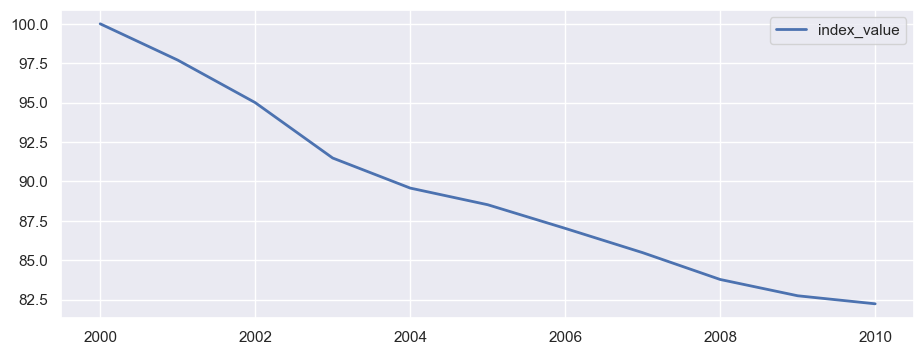

In [83]:
bilateral_methods(
    df_merged, 
    price_col='index',
    quantity_col='spending',
    product_id_col='product_name',
    date_col='Years',
    method='fisher',
    plot=True
    )

try the Laspeyres

,index_value
2000,1.000000
2001,0.976905
2002,0.949844
2003,0.915297
2004,0.897443
2005,0.888531
2006,0.875934
2007,0.861710
2008,0.847423
2009,0.837340


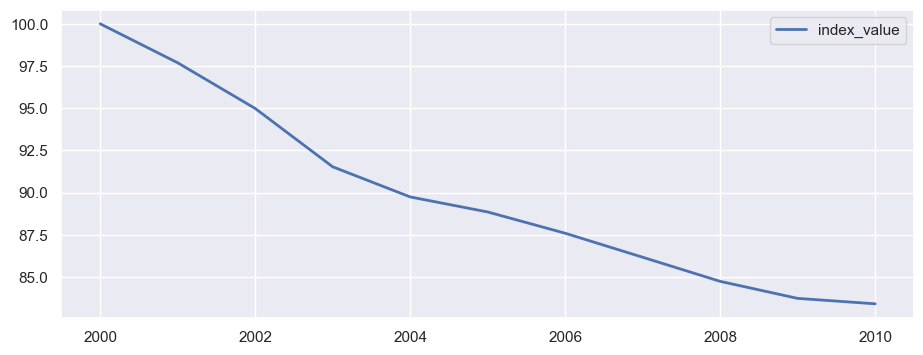

In [84]:
bilateral_methods(
    df_merged, 
    price_col='index',
    quantity_col='spending',
    product_id_col='product_name',
    date_col='Years',
    method='laspeyres',
    plot=True
    )